# Introduction

Quite often we start out with a dataframe and  want a quick overview of categorical features. We ideally want to check the number of categories/levels of each categorical attribute. We want to check the count/proportion for each of the discrete labels/categories of a categorical feature.  
  
  
This is such a common usecase that I have created a **custom module**.  
The output will be barplots of all the categories and annotating the axes with count/proportion of the categorical levels. This will become amply clear on seeing the output.  

While calling the function, I have kept the provision to pass a number of keyword arguments 
that would allow immense flexibility. This would also take into account multiple scenarios.  
  
The keyword arguments fall under following categories :
- plot layout parameters
- barwidth parameters  
- font family  
- font size parameter for xtick-labels, y-tick labels, axis labels
- Maximum Number of categorical levels per attribute to display  
- Configuring the text annotation of categorical levelwise count/proportion
  
The function requires atleast a dataframe to retun a output. 


# Custom function for easy and efficient analysis of categorical univariate

In [155]:
# Importing the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [211]:
# custom function for easy and efficient analysis of categorical univariate
def UVA_category(data_frame, var_group = [], **kargs):   
  '''
  Stands for Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and horizontal barplot.

  - data_frame : The Dataframe
  - var_group : The list of column names for univariate plots need to be plotted

  The keyword arguments are as follows :
  - col_count : The number of columns in the plot layout. Default value set is 2.
  For instance, if there are are 4# columns in var_group, then 4# univariate plots will be plotted in 2X2 layout.
  - colwidth : width of each plot
  - rowheight : height of each plot
  - normalize : Whether to present absolute values or percentage
  - sort_by : Whether to sort the bars by descending order of values
  - spine_linewidth : width of spine

  - change_ratio : default value is 0.7.
  If the width of each bar exceeds the barwidth_threshold,then the change_ratio
  is the proportion by which to change the bar width.
  - barwidth_threshold : default value is 0.2.
  Refers to proportion of the total height of the axes.
  Will be used to compare whether the bar width exceeds the barwidth_threshold.

  - axlabel_fntsize : Fontsize of x axis and y axis labels
  - infofntsize : Fontsize in the info of unique value counts
  - ax_xticklabel_fntsize : fontsize of x-axis tick labels
  - ax_yticklabel_fntsize : fontsize of y-axis tick labels
  - infofntfamily : Font family of info of unique value counts.
  Choose font family belonging to Monospace for multiline alignment.
  Some choices are : 'Consolas', 'Courier','Courier New', 'Lucida Sans Typewriter','Lucidatypewriter','Andale Mono'
  https://www.tutorialbrain.com/css_tutorial/css_font_family_list/
  - max_val_counts : Number of unique values for which count should be displayed
  - nspaces : Length of each line for the multiline strings in the info area for value_counts
  - ncountspaces : Length allocated to the count value for the unique values in the info area
  - show_percentage : Whether to show percentage of total for each unique value count
  Also check link for formatting syntax :
      https://docs.python.org/3/library/string.html#formatspec
      <Format Specification for minilanguage>

      https://mkaz.blog/code/python-string-format-cookbook/#f-strings
      https://pyformat.info/#number
      https://stackoverflow.com/questions/3228865/
  '''

  # *args and **kwargs are special keyword which allows function to take variable length argument.
  # *args passes variable number of non-keyworded arguments and on which operation of the tuple can be performed.
  # **kwargs passes variable number of keyword arguments dictionary to function on which operation of a dictionary can be performed.
  # *args and **kwargs make the function flexible.

  import textwrap
  data = data_frame.copy(deep = True)
  # Using dictionary with default values of keywrod arguments
  params_plot = dict(colcount = 2, colwidth = 7, rowheight = 4, \
                     spine_linewidth = 1, normalize = False, sort_by = "Values")
  params_bar= dict(change_ratio = 1, barwidth_threshold = 0.2)
  params_fontsize =  dict(axlabel_fntsize = 10,
                          ax_xticklabel_fntsize = 8,
                          ax_yticklabel_fntsize = 8,
                          infofntsize = 10)
  params_fontfamily = dict(infofntfamily = 'Andale Mono')
  params_max_val_counts = dict(max_val_counts = 10)
  params_infospaces = dict(nspaces = 10, ncountspaces = 4)
  params_show_percentage = dict(show_percentage = True)



  # Updating the dictionary with parameter values passed while calling the function
  params_plot.update((k, v) for k, v in kargs.items() if k in params_plot)
  params_bar.update((k, v) for k, v in kargs.items() if k in params_bar)
  params_fontsize.update((k, v) for k, v in kargs.items() if k in params_fontsize)
  params_fontfamily.update((k, v) for k, v in kargs.items() if k in params_fontfamily)
  params_max_val_counts.update((k, v) for k, v in kargs.items() if k in params_max_val_counts)
  params_infospaces.update((k, v) for k, v in kargs.items() if k in params_infospaces)
  params_show_percentage.update((k, v) for k, v in kargs.items() if k in params_show_percentage)

  #params = dict(**params_plot, **params_fontsize)

  # Initialising all the possible keyword arguments of doc string with updated values
  colcount = params_plot['colcount']
  colwidth = params_plot['colwidth']
  rowheight = params_plot['rowheight']
  normalize = params_plot['normalize']
  sort_by = params_plot['sort_by']
  spine_linewidth  =  params_plot['spine_linewidth']

  change_ratio = params_bar['change_ratio']
  barwidth_threshold = params_bar['barwidth_threshold']

  axlabel_fntsize = params_fontsize['axlabel_fntsize']
  ax_xticklabel_fntsize = params_fontsize['ax_xticklabel_fntsize']
  ax_yticklabel_fntsize = params_fontsize['ax_yticklabel_fntsize']
  infofntsize = params_fontsize['infofntsize']
  infofntfamily = params_fontfamily['infofntfamily']
  max_val_counts =  params_max_val_counts['max_val_counts']
  nspaces = params_infospaces['nspaces']
  ncountspaces = params_infospaces['ncountspaces']
  show_percentage = params_show_percentage['show_percentage']


  if len(var_group) == 0:
        var_group = data.select_dtypes(exclude = ['number']).columns.to_list()
  print(f'Categorical features : {var_group} \n')

  import matplotlib.pyplot as plt
  plt.rcdefaults()
  # setting figure_size
  size = len(var_group)
  #rowcount = 1
  #colcount = size//rowcount+(size%rowcount != 0)*1


  colcount = colcount
  #print(colcount)
  rowcount = size//colcount+(size%colcount != 0)*1

  fig = plt.figure(figsize = (colwidth*colcount,rowheight*rowcount), dpi = 150)


  # Converting the filtered columns as categorical
  for i in var_group:
        #data[i] = data[i].astype('category')
        data[i] = pd.Categorical(data[i])


  # for every variable
  for j,i in enumerate(var_group):
    #print('{} : {}'.format(j,i))
    norm_count = data[i].value_counts(normalize = normalize).sort_index()
    n_uni = data[i].nunique()

    if sort_by == "Values":
        norm_count = data[i].value_counts(normalize = normalize). \
        sort_values(ascending = False)
        
        n_uni = data[i].nunique()


    #Plotting the variable with every information
    plt.subplot(rowcount,colcount,j+1)
    sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)

    if normalize == False :
        plt.xlabel('count', fontsize = axlabel_fntsize )
    else :
        plt.xlabel('fraction/percent', fontsize = axlabel_fntsize )
    plt.ylabel('{}'.format(i), fontsize = axlabel_fntsize )

    ax = plt.gca()
    

    # textwrapping
    ax.set_yticklabels([textwrap.fill(str(e), 20) for e in norm_count.index],
                       fontsize = ax_yticklabel_fntsize)

    [labels.set(size = ax_xticklabel_fntsize) for labels in ax.get_xticklabels()]
    
    for key, _  in ax.spines._dict.items():
        ax.spines._dict[key].set_linewidth(spine_linewidth)

    #print(n_uni)
    #print(type(norm_count.round(2)))

    # Functions to convert the pairing of unique values and value_counts into text string
    # Function to break a word into multiline string of fixed width per line
    def paddingString(word, nspaces = 20):
        i = len(word)//nspaces \
            +(len(word)%nspaces > 0)*(len(word)//nspaces > 0)*1 \
            + (len(word)//nspaces == 0)*1
        strA = ""
        for j in range(i-1):
            strA = strA+'\n'*(len(strA)>0)+ word[j*nspaces:(j+1)*nspaces]

        # insert appropriate number of white spaces
        strA = strA + '\n'*(len(strA)>0)*(i>1)+word[(i-1)*nspaces:] \
               + " "*(nspaces-len(word)%nspaces)*(len(word)%nspaces > 0)
        return strA

    # Function to convert Pandas series into multi line strings
    def create_string_for_plot(ser, nspaces = nspaces, ncountspaces = ncountspaces, \
                              show_percentage =  show_percentage):
        '''
        - nspaces : Length of each line for the multiline strings in the info area for value_counts
        - ncountspaces : Length allocated to the count value for the unique values in the info area
        - show_percentage : Whether to show percentage of total for each unique value count
        Also check link for formatting syntax :
            https://docs.python.org/3/library/string.html#formatspec
            <Format Specification for minilanguage>

            https://mkaz.blog/code/python-string-format-cookbook/#f-strings
            https://pyformat.info/#number
            https://stackoverflow.com/questions/3228865/
        '''
        str_text = ""
        for index, value in ser.items():
            str_tmp = paddingString(str(index), nspaces)+ " : " \
                      + " "*(ncountspaces-len(str(value)))*(len(str(value))<= ncountspaces) \
                      + str(value) \
                      + (" | " + "{:4.1f}%".format(value/ser.sum()*100))*show_percentage


            str_text = str_text + '\n'*(len(str_text)>0) + str_tmp
        return str_text

    #print(create_string_for_plot(norm_count.round(2)))

    #Ensuring a maximum of 10 unique values displayed
    if norm_count.round(2).size <= max_val_counts:
        text = '{}\nn_uniques = {}\nvalue counts\n{}' \
                .format(i, n_uni,create_string_for_plot(norm_count.round(2)))
        ax.annotate(text = text,
                    xy = (1.1, 1), xycoords = ax.transAxes,
                    ha = 'left', va = 'top', fontsize = infofntsize, fontfamily = infofntfamily)
    else :
        text = '{}\nn_uniques = {}\nvalue counts of top 10\n{}' \
                .format(i, n_uni,create_string_for_plot(norm_count.round(2)[0:max_val_counts]))
        ax.annotate(text = text,
                    xy = (1.1, 1), xycoords = ax.transAxes,
                    ha = 'left', va = 'top', fontsize = infofntsize, fontfamily = infofntfamily)
    
    ax.patch.set_alpha(0)

    # Change Bar height if each bar height exceeds barwidth_threshold (default = 20%) of the axes y length
    from eda.axes_utils import Change_barWidth
    if ax.patches[1].get_height() >= barwidth_threshold*(ax.get_ylim()[1]-ax.get_ylim()[0]):
        Change_barWidth(ax.patches, change_ratio= change_ratio, orient = 'h')

  fig.tight_layout()
  return fig

# Implementing the custom function for overview of categorical features

We will showcase the use of custom function on following three datasets :  
- [simulated retail store dataset](#simulated_retail_store_dataset)
- [simulated customer subscription dataset](#simulated_customer_subscription_dataset)  
- [online shoppers purchasing intention dataset](#Online_Shoppers_Purchasing_Intention_Dataset)  
  
The first two datasets are **created from simulation**.

<a id='simulated_retail_store_dataset'></a>
## Simulated retail store dataset  
  
The simulation code for retail store dataset has been taken from 'Python for Marketing Research and Analytics' authored by Jason S. Schwarz, Chris Chapman, Elea McDonnell Feit. The book has well explained sections on simulating data for various usecases. It also helps building both intuition and practical acumen in using different probability distributions depending on attribute type.  
  
Another recommended reading for simulating datasets in python is 'Practical Time Series Analysis-Prediction with Statistics and Machine Learning' by Aileen Nelson.

### Creating simulated retail store dataset

In [212]:
def retail_store_data():
    '''
    This dataset represents observations of total sales by week
    for two competing products at a chain of stores.

    We create a data structure that will hold the data,
    a simulation of sales for the two products in 20 stores over
    2 years, with price and promotion status.

    # Constants
        N_STORES = 20
        N_WEEKS = 104

    The code has been taken from the book :
        • 'Python for Marketing Research and Analytics'
        by Jason S. Schwarz,Chris Chapman, Elea McDonnell Feit

    Additional links :
        • An information website: https://python-marketing-research.github.io
        • A Github repository: https://github.com/python-marketing-research/python-marketing-research-1ed
        • The Colab Github browser: https://colab.sandbox.google.com/github/python-marketing-research/python-marketing-research-1ed



    '''
    import pandas as pd
    import numpy as np
    # Constants
    N_STORES = 20
    N_WEEKS = 104

    # create a dataframe of initially missing values to hold the data
    columns = ('store_num', 'year', 'week', 'p1_sales', 'p2_sales',
               'p1_price', 'p2_price', 'p1_promo', 'p2_promo', 'country')
    n_rows = N_STORES * N_WEEKS

    store_sales = pd.DataFrame(np.empty(shape=(n_rows, 10)),
                               columns=columns)

    # Create store Ids
    store_numbers = range(101, 101 + N_STORES)

    # assign each store a country
    store_country = dict(zip(store_numbers,
                                     ['USA', 'USA', 'USA', 'DEU', 'DEU', 'DEU',
                                      'DEU', 'DEU', 'GBR', 'GBR', 'GBR', 'BRA',
                                      'BRA', 'JPN', 'JPN', 'JPN', 'JPN', 'AUS',
                                      'CHN', 'CHN']))

    # filling in the store_sales dataframe:
    i = 0
    for store_num in store_numbers:
        for year in [1, 2]:
            for week in range(1, 53):
                store_sales.loc[i, 'store_num'] = store_num
                store_sales.loc[i, 'year'] = year
                store_sales.loc[i, 'week'] = week
                store_sales.loc[i, 'country'] = store_country[store_num]
                i += 1

    # setting the variable types correctly using the astype method
    store_sales.loc[:,'country'] = store_sales['country'].astype( pd.CategoricalDtype())
    store_sales.loc[:,'store_num'] = store_sales['store_num'].astype(pd.CategoricalDtype())
    #print(store_sales['store_num'].head())
    #print(store_sales['country'].head())


    # For each store in each week,
    # we want to randomly determine whether each product was promoted or not.
    # We randomly assign 10% likelihood of promotion for product 1, and
    # 15% likelihood for product 2.

    # setting the random seed
    np.random.seed(37204)

    # 10% promoted
    store_sales.p1_promo = np.random.binomial(n=1, p=0.1, size=n_rows)

    # 15% promoted
    store_sales.p2_promo = np.random.binomial(n=1, p=0.15, size=n_rows)


    # we set a price for each product in each row of the data.
    # We suppose that each product is sold at one of five distinct \
    # price points ranging from $2.19 to $3.19 overall. We randomly \
    # draw a price for each week by defining a vector with the five \
    # price points and using np.random.choice(a, size, replace) to \
    # draw from it as many times as we have rows of data (size=n_rows). \
    # The five prices are sampled many times, so we sample with replacement.

    store_sales.p1_price = np.random.choice([2.19, 2.29, 2.49, 2.79, 2.99],
                                            size=n_rows)
    store_sales.p2_price = np.random.choice([2.29, 2.49, 2.59, 2.99,3.19],
                                            size=n_rows)
    #store_sales.sample(5) # now how does it look?


    # simulate the sales figures for each week. We calculate sales as a \
    # function of the relative prices of the two products along with the  \
    # promotional status of each.

    # Item sales are in unit counts, so we use the Poisson distribution \
    # to generate count data

    # sales data, using poisson (counts) distribution, np.random.poisson()
    # first, the default sales in the absence of promotion
    sales_p1 = np.random.poisson(lam=120, size=n_rows)
    sales_p2 = np.random.poisson(lam=100, size=n_rows)


    # Price effects often follow a logarithmic function rather than a \
    # linear function (Rao 2009)
    # scale sales according to the ratio of log(price)

    log_p1_price = np.log(store_sales.p1_price)
    log_p2_price = np.log(store_sales.p2_price)
    sales_p1 = sales_p1 * log_p2_price/log_p1_price
    sales_p2 = sales_p2 * log_p1_price/log_p2_price

    # We have assumed that sales vary as the inverse ratio of prices.  \
    # That is, sales of Product 1 go up to the degree that  \
    # the log(price) of Product 1 is lower than the log(price) of Product 2.


    # we assume that sales get a 30 or 40% lift when each product is promoted  \
    # in store. We simply multiply the promotional status vector (which comprises all {0, 1} values) \
    # by 0.3 or 0.4 respectively, and then multiply the sales vector by that.


    # final sales get a 30% or 40% lift when promoted
    store_sales.p1_sales = np.floor(sales_p1 *(1 + store_sales.p1_promo * 0.3))
    store_sales.p2_sales = np.floor(sales_p2 *(1 + store_sales.p2_promo * 0.4))

    return store_sales


In [158]:
df1 = retail_store_data()

### Inspecting the dataframe

In [213]:
df1.head()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,115.0,114.0,2.79,2.59,0,0,USA
1,101.0,1.0,2.0,131.0,87.0,2.49,2.49,0,0,USA
2,101.0,1.0,3.0,176.0,74.0,2.29,3.19,0,0,USA
3,101.0,1.0,4.0,125.0,115.0,2.19,2.29,0,0,USA
4,101.0,1.0,5.0,114.0,120.0,2.99,2.49,0,0,USA


In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_num  2080 non-null   category
 1   year       2080 non-null   float64 
 2   week       2080 non-null   float64 
 3   p1_sales   2080 non-null   float64 
 4   p2_sales   2080 non-null   float64 
 5   p1_price   2080 non-null   float64 
 6   p2_price   2080 non-null   float64 
 7   p1_promo   2080 non-null   int64   
 8   p2_promo   2080 non-null   int64   
 9   country    2080 non-null   category
dtypes: category(2), float64(6), int64(2)
memory usage: 135.2 KB


In [215]:
df1.describe()

,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo
count,2080.00000,2080.00000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,1.50000,26.50000,132.658173,100.928365,2.555721,2.705769,0.096154,0.153846
std,0.50012,15.01194,28.632719,25.084833,0.299788,0.330379,0.294873,0.360888
min,1.00000,1.00000,72.000000,50.000000,2.190000,2.290000,0.000000,0.000000
25%,1.00000,13.75000,112.000000,83.000000,2.290000,2.490000,0.000000,0.000000
50%,1.50000,26.50000,128.000000,97.000000,2.490000,2.590000,0.000000,0.000000
75%,2.00000,39.25000,150.000000,116.000000,2.790000,2.990000,0.000000,0.000000
max,2.00000,52.00000,263.000000,223.000000,2.990000,3.190000,1.000000,1.000000


#### Checking null values

In [216]:
df1.isnull().sum()

store_num    0
year         0
week         0
p1_sales     0
p2_sales     0
p1_price     0
p2_price     0
p1_promo     0
p2_promo     0
country      0
dtype: int64

#### Number of unique values for each feature

In [217]:
print(df1.nunique(axis=0))

store_num     20
year           2
week          52
p1_sales     153
p2_sales     139
p1_price       5
p2_price       5
p1_promo       2
p2_promo       2
country        7
dtype: int64


### EDA overview of categorical features

Categorical features : ['store_num', 'country'] 



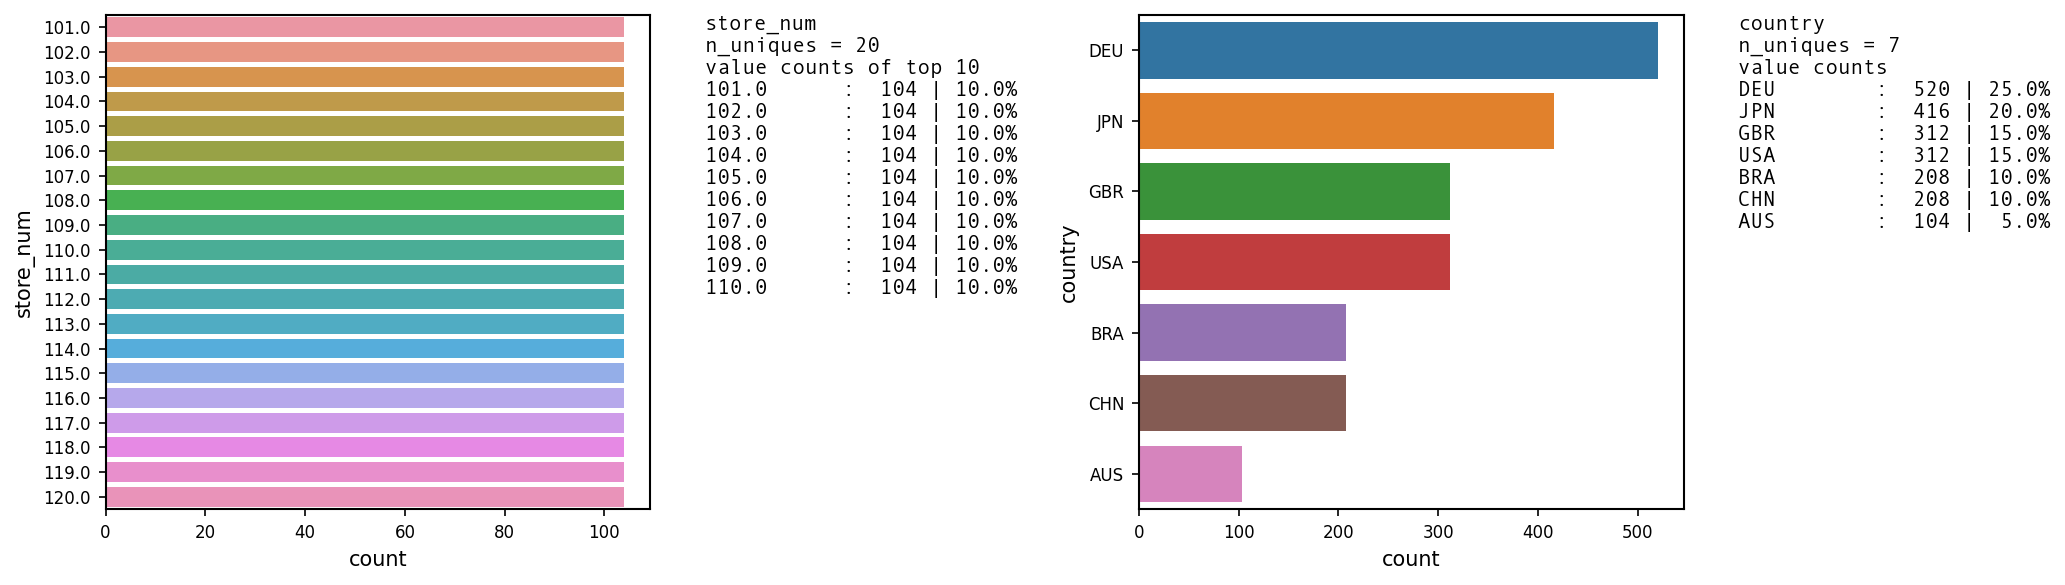

In [218]:
fig = UVA_category(df1)

<a id='simulated_customer_subscription_dataset'></a>
## Simulated customer subscription dataset  
  
The simulation code for customer subscription  dataset has been taken from 'Python for Marketing Research and Analytics' authored by Jason S. Schwarz, Chris Chapman, Elea McDonnell Feit. The book has well explained sections on simulating data for various usecases. It also helps building both intuition and practical acumen in using different probability distributions depending on attribute type.

Another recommended reading for simulating datasets in python is 'Practical Time Series Analysis-Prediction with Statistics and Machine Learning' by Aileen Nelson.


### Creating simulated customer subscription dataset

In [219]:
def customer_subscription(debug = False):
    '''Customer subscription data

    This dataset exemplifies a consumer segmentation project.
    We are offering a subscription-based service (such as cable television or membership in a warehouse club)
    and have collected data from N = 300 respondents on age, gender, income, number of children, whether they own or rent their homes, and whether they currently subscribe to the offered service or not.

    The code has been taken from the book :
        • 'Python for Marketing Research and Analytics'
        by Jason S. Schwarz,Chris Chapman, Elea McDonnell Feit
        Chapter 5 - Comparing Groups: Tables and Visualizations

    Additional links :
        • An information website: https://python-marketing-research.github.io
        • A Github repository: https://github.com/python-marketing-research/python-marketing-research-1ed
        • The Colab Github browser: https://colab.sandbox.google.com/github/python-marketing-research/python-marketing-research-1ed

    '''

    # Defining the six variables
    segment_variables = ['age', 'gender', 'income', 'kids', 'own_home',
                         'subscribe']

    # segment_variables_distribution defines what kind of data will be
    # present in each of those variables: normal data (continuous), binomial (yes/no), or Poisson (counts).
    # segment_variables_ distribution is a dictionary keyed by the variable name.

    segment_variables_distribution = dict(zip(segment_variables,
                                              ['normal', 'binomial',
                                               'normal','poisson',
                                               'binomial', 'binomial']))

    # segment_variables_distribution['age']


    # defining the statistics for each variable in each segment:
    segment_means = {'suburb_mix': [40, 0.5, 55000, 2, 0.5, 0.1],
                     'urban_hip': [24, 0.7, 21000, 1, 0.2, 0.2],
                     'travelers': [58, 0.5, 64000, 0, 0.7, 0.05],
                     'moving_up': [36, 0.3, 52000, 2, 0.3, 0.2]}


    # standard deviations for each segment
    # None = not applicable for the variable)
    segment_stddev = {'suburb_mix': [5, None, 12000, None, None, None],
                      'urban_hip': [2, None, 5000, None, None, None],
                      'travelers': [8, None, 21000, None, None, None],
                      'moving_up': [4, None, 10000, None, None, None]}


    segment_names = ['suburb_mix', 'urban_hip', 'travelers', 'moving_up']
    segment_sizes = dict(zip(segment_names,[100, 50, 80, 70]))

    # iterate through all the segments and all the variables and create a
    # dictionary to hold everything:
    segment_statistics = {}
    for name in segment_names:
        segment_statistics[name] = {'size': segment_sizes[name]}
        for i, variable in enumerate(segment_variables):
            segment_statistics[name][variable] = {
                'mean': segment_means[name][i],
                'stddev': segment_stddev[name][i]}

    if debug == True :
        print('segment_statistics : {}'.format(segment_statistics.keys()))
        print('segment_names : {}'.format(segment_statistics))

    # Final Segment Data Generation

    #Set up dictionary "segment_constructor" and pseudorandom number sequence
    #For each SEGMENT i in "segment_names" {
      # Set up a temporary dictionary "segment_data_subset" for this SEGMENT’s data

      # For each VARIABLE in "seg_variables" {
        # Check "segment_variable_distribution[variable]" to find distribution type for VARIABLE

        # Look up the segment size and variable mean and standard deviation in segment_statistics
        # for that SEGMENT and VARIABLE to
        # ... Draw random data for VARIABLE (within SEGMENT) with
        # ... "size" observations
    # }
      # Add this SEGMENT’s data ("segment_data_subset") to the overall data ("segment_constructor")
      # Create a DataFrame "segment_data" from "segment_constructor"
    # }


    import numpy as np
    import pandas as pd
    np.random.seed(seed=2554)
    segment_constructor = {}
    # Iterate over segments to create data for each
    for name in segment_names:
        segment_data_subset = {}
        if debug == True :
            print('segment: {0}'.format(name))
        # Within each segment, iterate over the variables and generate data
        for variable in segment_variables:
            if debug == True :
                print('\tvariable: {0}'.format(variable))
            if segment_variables_distribution[variable] == 'normal':
                # Draw random normals
                segment_data_subset[variable] = np.random.normal(
                    loc=segment_statistics[name][variable]['mean'],
                    scale=segment_statistics[name][variable]['stddev'],
                    size=segment_statistics[name]['size']
                )
            elif segment_variables_distribution[variable] == 'poisson':
                # Draw counts
                segment_data_subset[variable] = np.random.poisson(
                    lam=segment_statistics[name][variable]['mean'],
                    size=segment_statistics[name]['size']
                )
            elif segment_variables_distribution[variable] == 'binomial':
                # Draw binomials
                segment_data_subset[variable] = np.random.binomial(
                    n=1,
                    p=segment_statistics[name][variable]['mean'],
                    size=segment_statistics[name]['size']
                )
            else:
                # Data type unknown
                if debug == True :
                    print('Bad segment data type: {0}'.format(
                        segment_variables_distribution[j])
                        )
                raise StopIteration
            segment_data_subset['Segment'] = np.repeat(
                name,
                repeats=segment_statistics[name]['size']
            )
            segment_constructor[name] = pd.DataFrame(segment_data_subset)

    segment_data = pd.concat(segment_constructor.values())


    # perform a few housekeeping tasks,
    # converting each binomial variable to clearer values, booleans or strings:
    segment_data['gender'] = (segment_data['gender'] \
                              .apply( lambda x: 'male' if x else 'female'))
    segment_data['own_home'] = (segment_data['own_home'] \
                                .apply(lambda x: True if x else False ))
    segment_data['subscribe'] = (segment_data['subscribe'] \
                                 .apply( lambda x: True if x else False))
    return segment_data

In [220]:
df2 = customer_subscription()

### Inspecting the dataframe

In [221]:
df2.head()

,age,Segment,gender,income,kids,own_home,subscribe
0,44.057078,suburb_mix,female,54312.575694,3,False,False
1,34.284213,suburb_mix,female,67057.192182,1,False,False
2,45.159484,suburb_mix,female,56306.492991,3,True,False
3,41.032557,suburb_mix,male,66329.337521,1,False,True
4,41.781819,suburb_mix,female,56500.410372,2,False,False


#### Checking null values

In [222]:
df2.isnull().sum()

age          0
Segment      0
gender       0
income       0
kids         0
own_home     0
subscribe    0
dtype: int64

#### Number of unique values for each feature

In [223]:
print(df2.nunique(axis=0))

age          300
Segment        4
gender         2
income       300
kids           8
own_home       2
subscribe      2
dtype: int64


### EDA overview of categorical features

Categorical features : ['Segment', 'gender', 'own_home', 'subscribe'] 



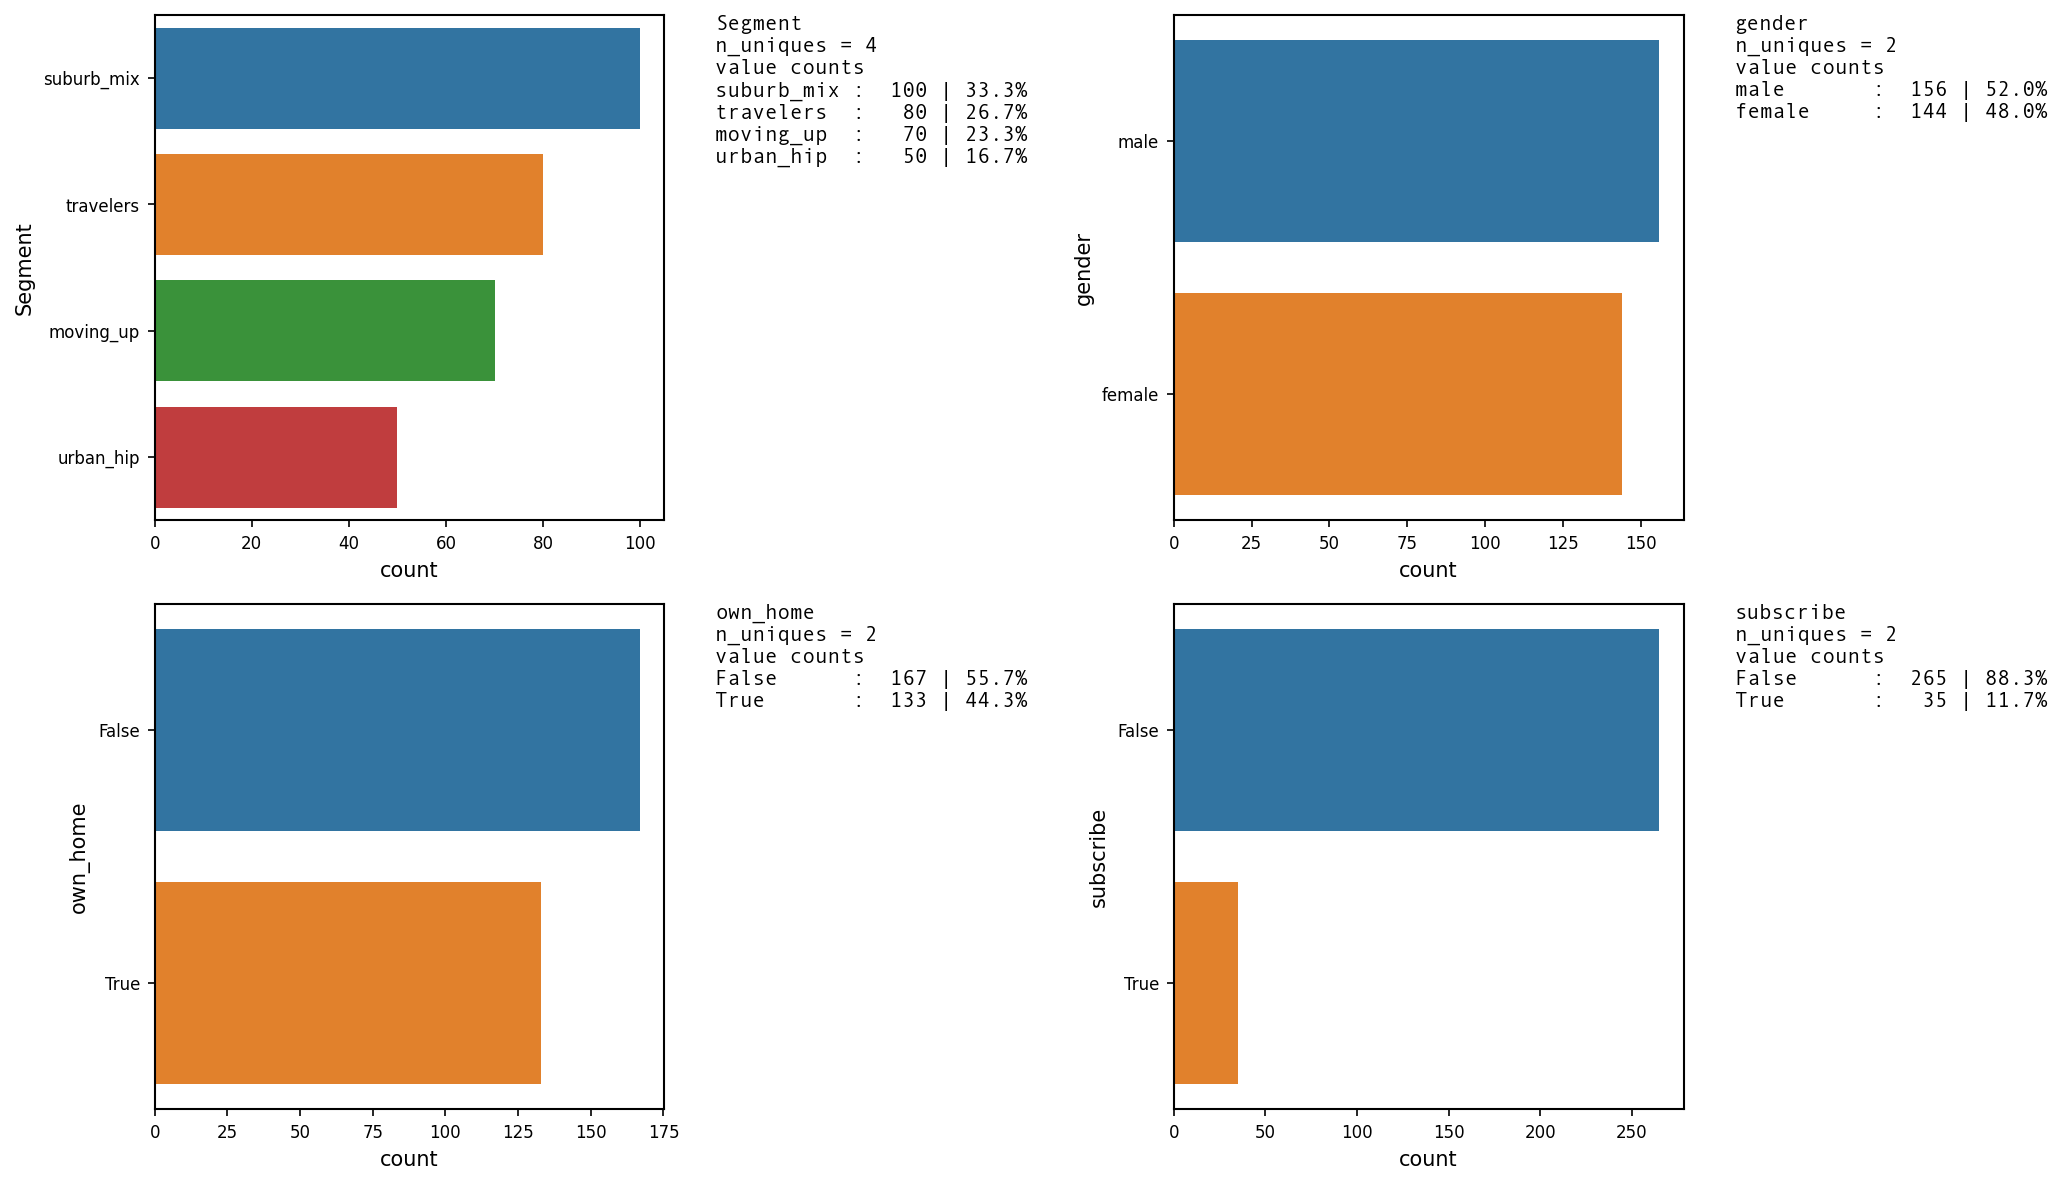

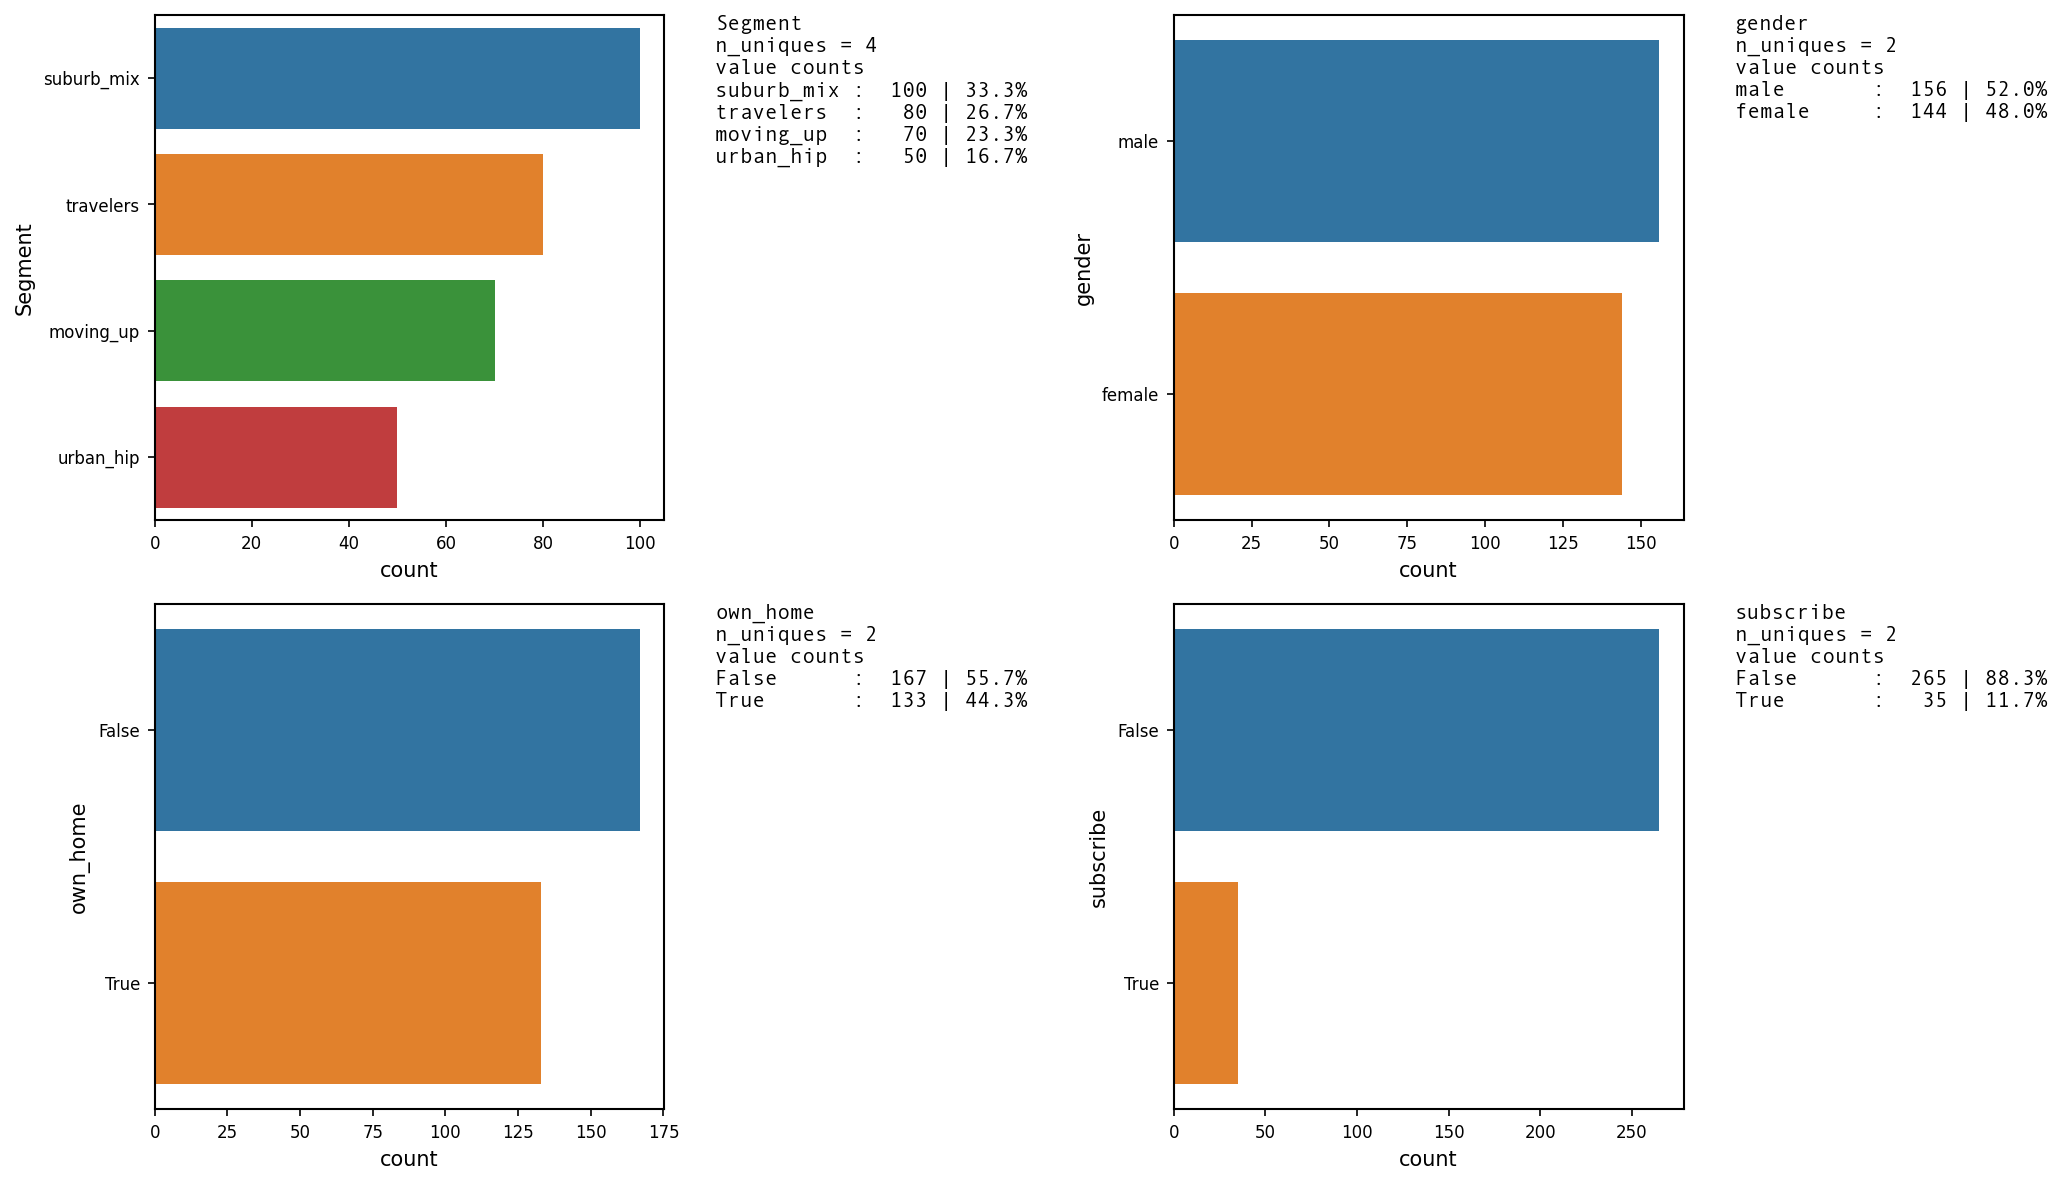

In [224]:
UVA_category(df2)

<a id='Online_Shoppers_Purchasing_Intention_Dataset'></a>
## Online Shoppers Purchasing Intention Dataset

### Loading the dataset

- We have downloaded dataset from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) and locally stored it.  
- We load the dataset into a dataframe using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [225]:
path = "/Users/bhaskarroy/BHASKAR FILES/BHASKAR CAREER/Data Science/Practise/\
Python/UCI Machine Learning Repository/Online Shoppers Purchasing Intention Dataset Data Set/"

path1 = path + "online_shoppers_intention.csv"

In [226]:
df3 = pd.read_csv(path1)

### About the dataset
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

### Column Descriptions  

- **Administrative**: This is the number of pages of this type (administrative) that the user visited.  
- **Administrative_Duration**: This is the amount of time spent in this category of pages.
- **Informational**: This is the number of pages of this type (informational) that the user visited.
- **Informational_Duration**: This is the amount of time spent in this category of pages.
- **ProductRelated**: This is the number of pages of this type (product related) that the user visited.  
- **ProductRelated_Duration**: This is the amount of time spent in this category of pages.
- **BounceRates**: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks. (https://support.google.com/analytics/answer/1009409?)
- **ExitRates**: The percentage of pageviews on the website that end at that specific page.  
(https://support.google.com/analytics/answer/2525491?)
- **PageValues**: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. (https://support.google.com/analytics/answer/2695658?hl=en)
- **SpecialDay**: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
- **Month**: Contains the month the pageview occurred, in string form.
- **OperatingSystems**: An integer value representing the operating system that the user was on when viewing the page.
- **Browser**: An integer value representing the browser that the user was using to view the page.
- **Region**: An integer value representing which region the user is located in.
- **TrafficType**: An integer value representing what type of traffic the user is categorized into. (https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)
- **VisitorType**: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- **Weekend**: A boolean representing whether the session is on a weekend.
- **Revenue**: A boolean representing whether or not the user completed the purchase.

### Inspecting the dataframe

In [227]:
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [228]:
df3.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Checking null values

In [229]:
df3.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Number of unique values for each feature

In [230]:
uniques = df3.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [231]:
print(list(df3.columns))

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


### EDA overview of categorical features

Categorical features : ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Revenue'] 



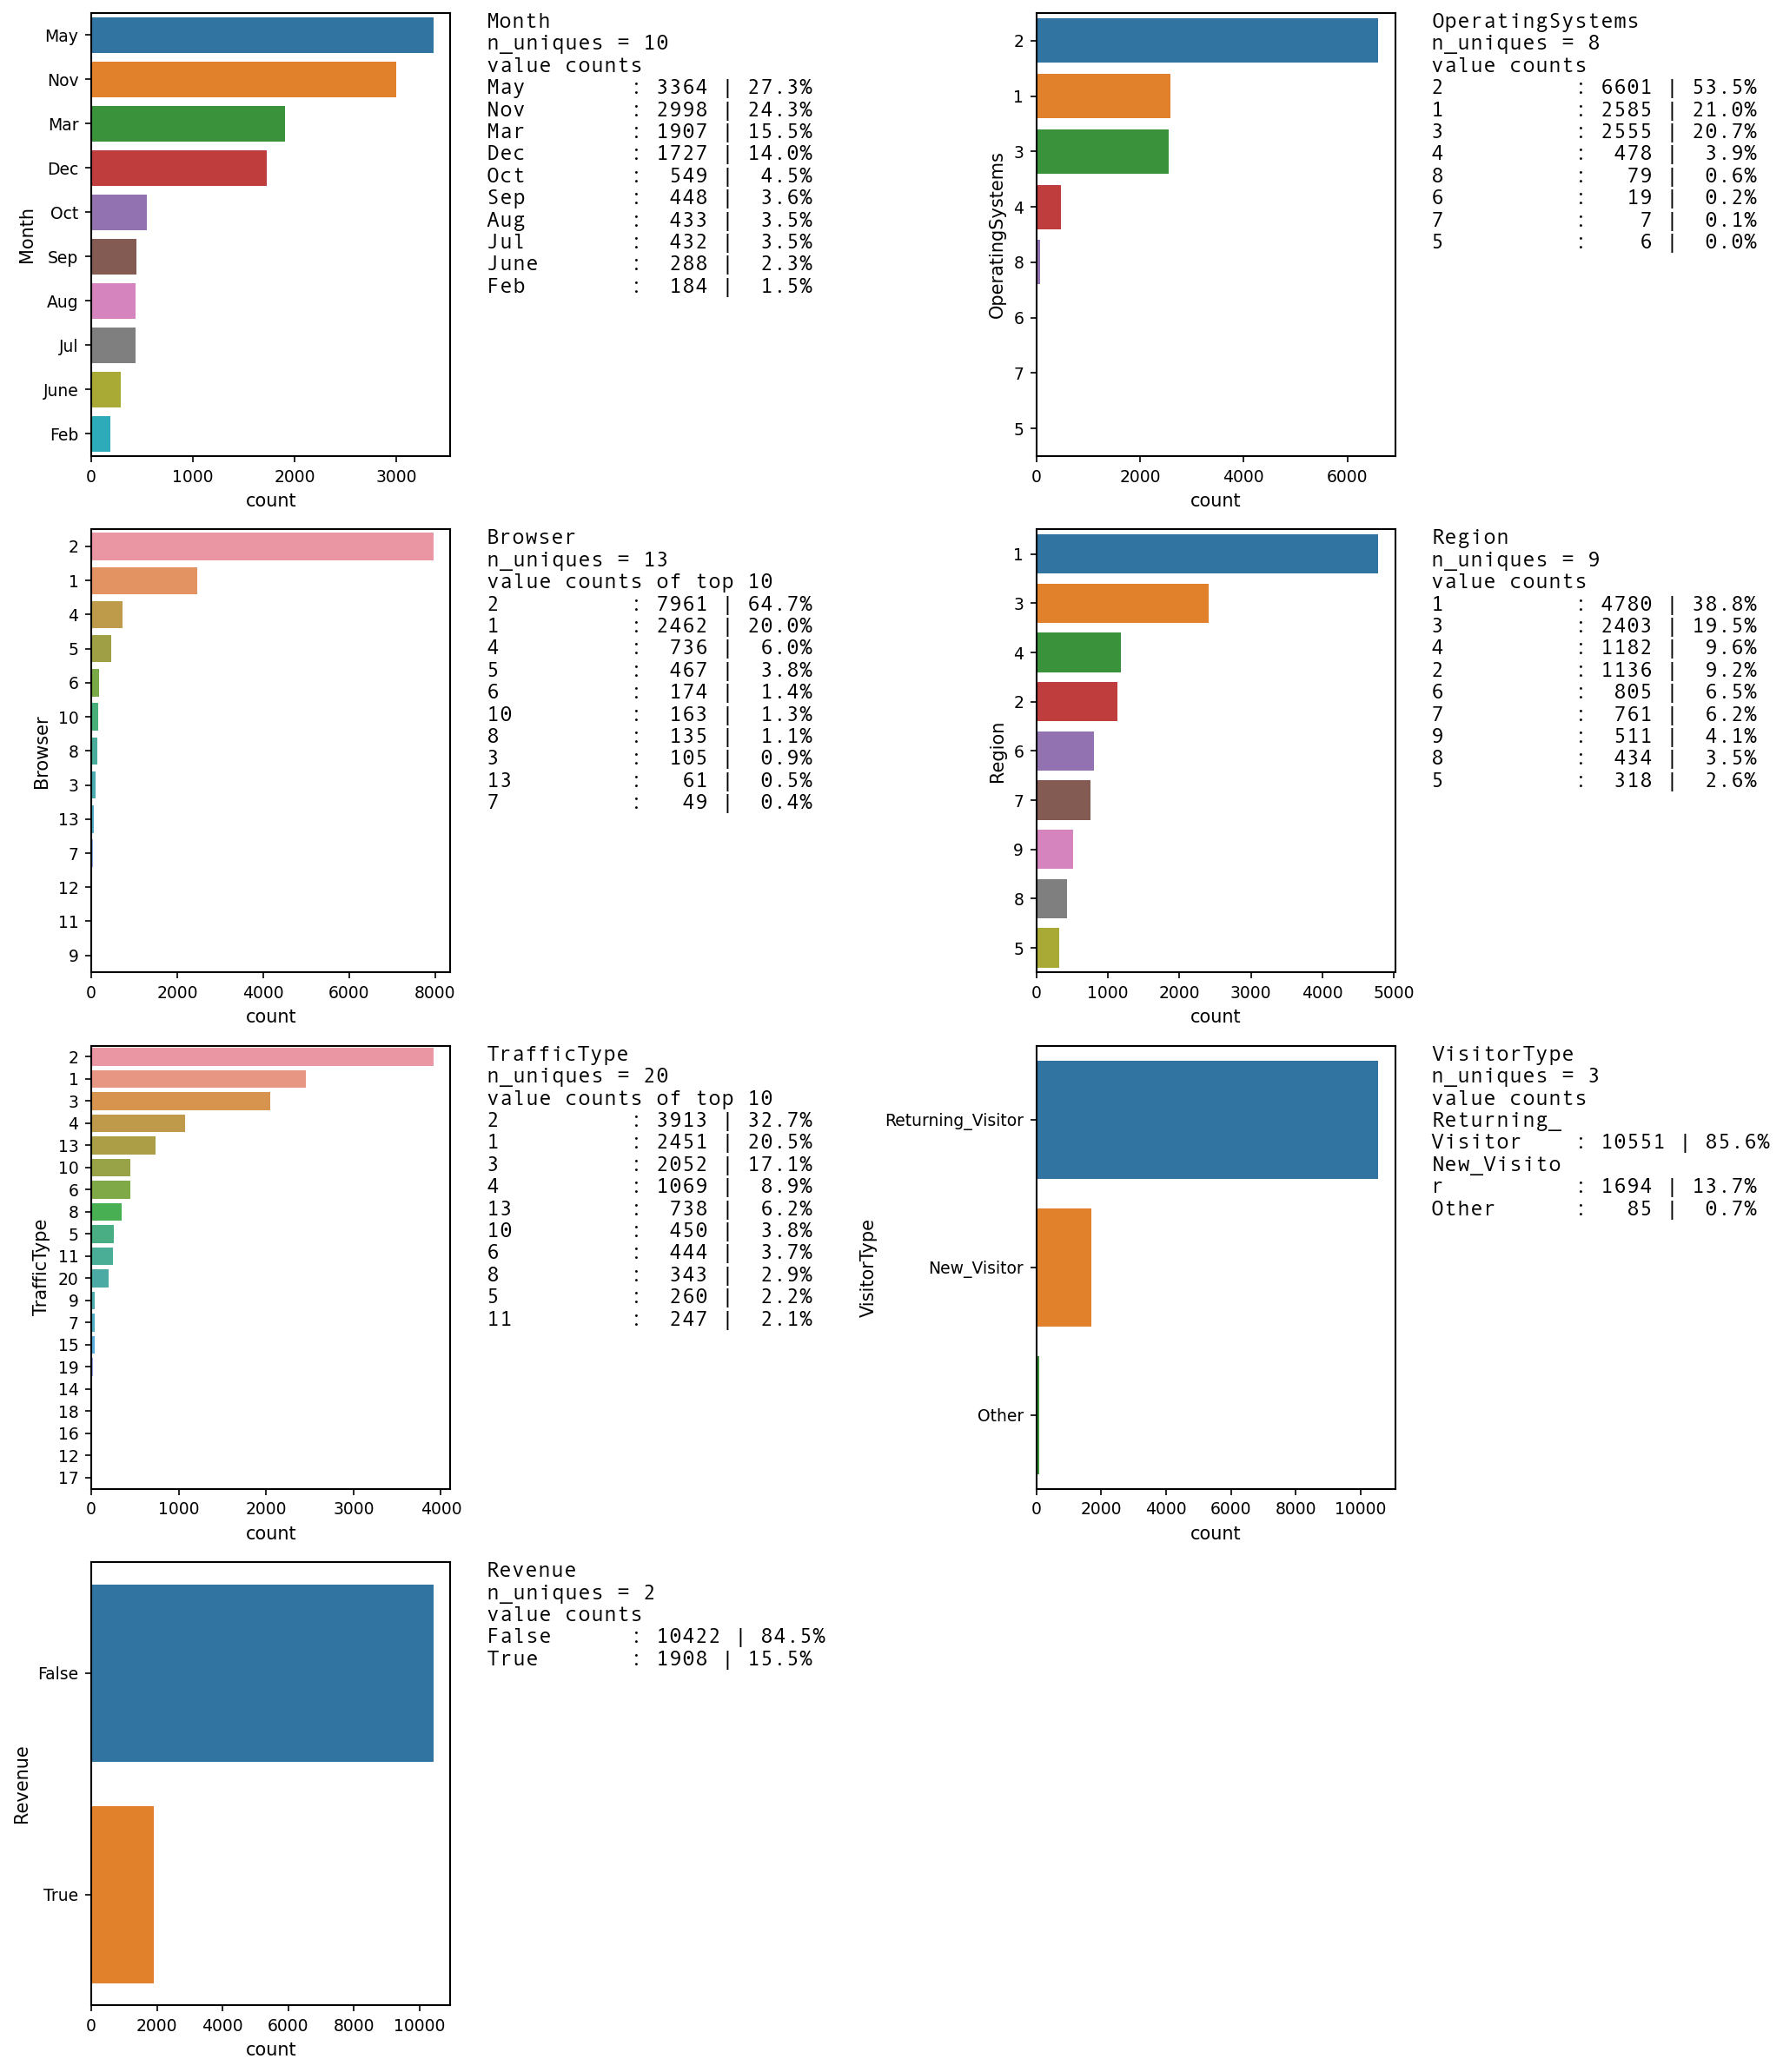

In [233]:
list2 = ['Month', 'OperatingSystems', 'Browser','Region', 'TrafficType', 'VisitorType','Revenue']
fig = UVA_category(df3, list2,normalize = False, 
                               axlabel_fntsize= 10, 
                               ax_xticklabel_fntsize = 9, ax_yticklabel_fntsize = 9,
                               infofntsize= 12)

#fig.savefig('online_shopper_purchasing_intention_dataset.png',transparent = True, dpi = 200)
#https://stackoverflow.com/questions/4581504/how-to-set-opacity-of-background-colour-of-graph-with-matplotlib

# Useful links  
- [Set opacity of background colour in matplotlib](https://stackoverflow.com/questions/4581504/how-to-set-opacity-of-background-colour-of-graph-with-matplotlib)  
- [PEP style guide for python code](https://peps.python.org/pep-0008/)  
- [Python for marketing research and analytics Notebooks](https://github.com/python-marketing-research/python-marketing-research-1ed)